# Import library

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy.integrate import quad, odeint
from scipy.misc import derivative
import sdepy

# Brief Introduction
<p> The following codes will discuss and show the numerical calculation of [mean], [variance], [information rate], and [information length]. Before every script, the mathematics formulas are shown for the convenience of the reader. In conjunction to the formulas, some explanation of are given too. Besides, further explanations and purposes are stated in the script for better understanding. </p>
<p> The mathematic formulas discussed in detail in the text of "Information geometry, fluctuations, non-equilibriumthermodynamics, and geodesics in complex systems" written by Eun-jin Kim </p>

# Mean versus Time
<p> Mean is given as $\left< x(t) \right> = x_0 e^{-\gamma t} + \gamma \int^{t}_{0} dt_1 \ e^{-\gamma (t-t_1)} f(t_1) $. In this example the function $f(t_1) =0$.</p>

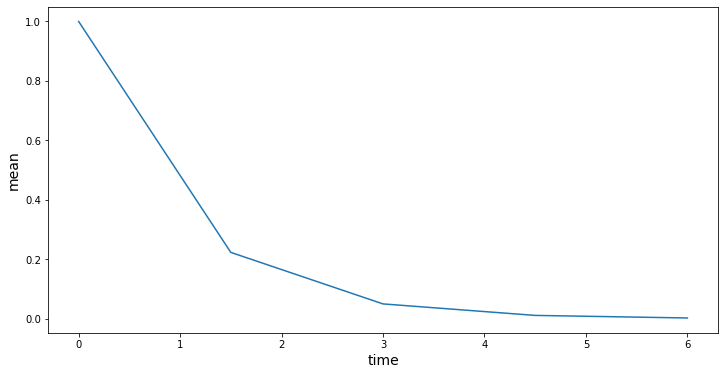

In [2]:
#value for the [time]
t = np.linspace(0,6,5)

#define the function for [mean]
def mean(i,x0,g,f1,t1):
    return x0*np.exp(-g*i)+quad(lambda i: g*f1*np.exp(-g*(t1-i)), 0, i)
    
#parameter for [mean]
g=1   #gamma
f1=0  #f(t_1)
x0=1  #x_0

#empty set for storing the data point
m=[]

#[mean] calculation
for i in t: 
    t1=i
    m1 = mean(i,x0,g,f1,t1)
    m.append(m1[0])
    
plt.plot(t,m)
plt.xlabel('time', fontsize=14)
plt.ylabel('mean', fontsize=14)
plt.show()

# Variance versus Time 
<p> Variance is given as $\frac{1}{2\beta(t)} = \frac{e^{-2\gamma t}}{2\beta_0} + \frac{D(1-e^{-2\gamma t})}{\gamma} = \sigma^2$ </p>

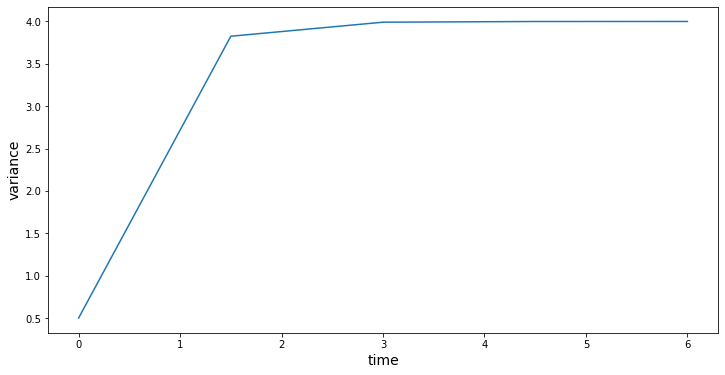

In [3]:
#define the function for [variance]
def var(i, g, b0, D):
    return (np.exp(-2*g*i))/(2*b0) + (D*(1-np.exp(-2*g*i)))/(g)

#parameter for [variance] 
b0=1  #b0
D=4   #D

#empty set for storing the data point
var_data=[]

#[variance] calculation 
for i in t:
    var1 = var(i, g, b0, D)
    var_data.append(var1)

plt.plot(t,var_data)
plt.xlabel('time', fontsize=14)
plt.ylabel('variance', fontsize=14)
plt.show()

# Information rate versus Time
<p> Information rate $\Gamma$ is quantify by $\Gamma^2 = \int dx \ p(x,t) (\partial_x \ln{p(x,t)})^2 = 4 \int dx \ (\partial_t q(t))^2$. </p>
<p> For simple calculation/numerically compute the information rate using, the following equation is used by utilizing $\Gamma^2 = 2\beta(\partial_t \left< x \right>)^2 + \frac{(\partial_t \beta)^2}{2\beta^2} = \frac{1}{\sigma^2} \left[ 2(\partial_t \sigma)^2 + (\partial_t \left< x \right>)^2 \right]$ by calculating the values of $\partial_t \sigma$ and $\partial_t \left< x \right>$ </p>

10.031834351783246
0.1310112331357395
0.025109883462627675
0.0055569902405876795
0.0012394233999276597


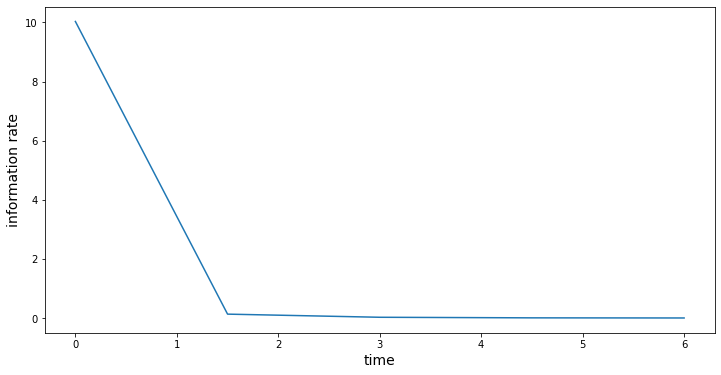

In [4]:
#empty set for storing the data point
info_rate = []

#[information rate] calculation. [variance] and [mean] functions are used. 
for i in t:
    t1=i
    dif_std = derivative(lambda i: np.sqrt(var(i, g, b0, D)), i, dx=0.01)
    dif_mean = derivative(lambda i: mean(i,x0,g,f1,t1), i, dx=0.01)
    std1 = np.sqrt(var(i, g, b0, D))
    info_rate1 = np.sqrt((2*dif_std**2+dif_mean[0]**2)/(std1**2))
    info_rate.append(info_rate1)
    print(info_rate1)
    
plt.plot(t, info_rate)
plt.xlabel('time', fontsize=14)
plt.ylabel('information rate', fontsize=14)
plt.show()

# Information length versus Time
<p> Information length is calculated via $\mathcal{L}(t) = \int^{t}_{0} dt_1 \Gamma(t_1)$. From previous discussion, the information rate can be related as follows $\Gamma^2 = \frac{1}{\sigma^2} \left[ 2(\partial_t \sigma)^2 + (\partial_t \left< x \right>)^2 \right]$. After conducting the analytic calculation, information length can be expressed as $\mathcal{L}(t) = \int^{t}_{0} dt_1 \ \sqrt{\frac{2\beta_0\gamma e^{-2\gamma t}\left[ 2 e^{-2\gamma t} \left( 2D - \frac{\gamma}{\beta_0} \right)^2 + x_0^2\gamma^2 + \frac{f(t)}{e^{-2\gamma t}} \right]}{\gamma e^{-2\gamma t} + 2 \beta_0 D \left( 1-e^{-2 \gamma t} \right)}}$. Reader can attempts the calculation by calculating $\partial_t \sigma$ and $\partial_t \left< x \right>$ with the expression from above. </p>

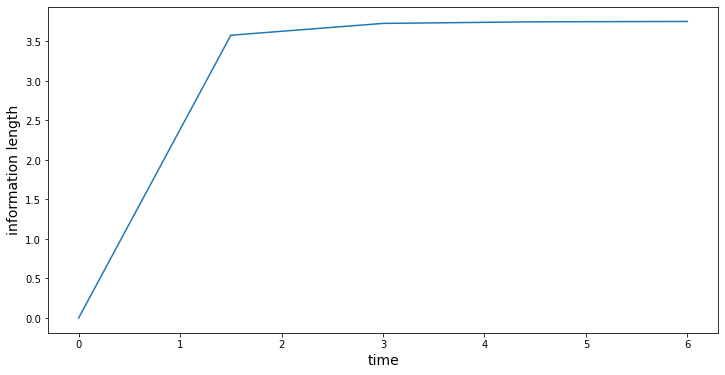

In [39]:
def A(i,g):
    return np.exp(-2*g*i)

info_length=[]

for i in t:
    x = quad(lambda i: np.sqrt((2*b0*g*A(i,g)*(2*A(i,g)*(2*D-(g)/(b0))**2+x0**2*g**2)+f1/A(i,g))/(g*A(i,g)+2*b0*D*(1-A(i,g)))),0, i)
    info_length.append(x[0])
    
plt.plot(t, info_length)
plt.xlabel('time', fontsize=14)
plt.ylabel('information length', fontsize=14)
plt.show()

# Information length versus Time
<p> Information length can be obtained via $\mathcal{L}(t) = \int^{t}_{0} dt_1 \Gamma(t_1)$. To show the [information length] separate in a 'new section', reader may notice the present of same code as [information rate] in the [for-loop]. </p>

In [38]:
#t = np.linspace(0,5,10)

info_rate = []

#[information length] calculation. [information rate] is used. 
for i in t:
    t1=i
    dif_std = derivative(lambda i: np.sqrt(var(i, g, b0, D)), i, dx=0.01)
    dif_mean = derivative(lambda i: mean(i,x0,g,f1,t1), i, dx=0.01)
    std1 = np.sqrt(var(i, g, b0, D))
    info_rate1 = np.sqrt((2*dif_std**2+dif_mean[0]**2)/(std1**2))
    info_rate.append(info_rate1)
    print(info_rate1)
    diff = info_rate[i]-info_rate[i-1]
    print(diff)
   
print(t)
print(info_rate)

info_len1 = np.trapz(info_rate, t, dx=0.01)
print(info_len1)
    
#plt.plot(t,info_len1)
#plt.xlabel('time', fontsize=14)
#plt.ylabel('information length', fontsize=14)
#plt.show()

10.031834351783246


TypeError: list indices must be integers or slices, not numpy.float64